In [1]:
import os
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import accuracy_score, confusion_matrix

<h1>Image Generator Class</h1>
<li>We start our model by preprocessing our images.</li>
<li>Kera's ImageDataGenerator class gives us useful methods to do this. </li>

In [2]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

<li>We will create a ImageDataGenerator object with rescale attribute 1/255.</li>
<li>We rescale to normalize our images; you want values to be as small as possible for optimization.</li>
<h5>For an image with RGB values:</h5>
<p>Original pixel value: <br>
&nbsp;&nbsp;&nbsp;&nbsp;[120, 200, 255] <br> 
Normalized pixel value (using rescale = 1/255): <br>
&nbsp;&nbsp;&nbsp;&nbsp;120/255, 200/255, 255/255 = 0.47, 0.78, 1.0 </p>

In [10]:
image_data_gen = ImageDataGenerator(rescale=1/255) # scaling by 1/255 to get pixel values between 0 and 1

In [11]:
# Now we will preprocess data using the method from ImageDataGen. class flow_from_directory

train_image_batch_iterator = image_data_gen.flow_from_directory(
    directory='/Users/keirajames/Desktop/archive-2/train/',
    batch_size=32,
    class_mode='binary', # defines the type of label arrays that are returned; binary labels (0 or 1)
    shuffle=True, # shuffle the photos before each epoch
    #save_to_dir= '/.../save_here/', # Directory to save augmented images to
)

Found 78528 images belonging to 2 classes.


In [12]:
type(train_image_batch_iterator) # Tells us that we have a type Iterator; it iterates over batches of our training data

keras.src.legacy.preprocessing.image.DirectoryIterator

<h3>Lets Visualize 1 batch. It'll let us see how it is labeled ( 0 or 1 ) </h3>

In [22]:
image, label = next(train_image_batch_iterator) # the next method allows us to grab the next batch and returns a tuple
                                          # returns a numpy array of images and a label based on the class_mode 
                                          # specified in flow_from_directory method.

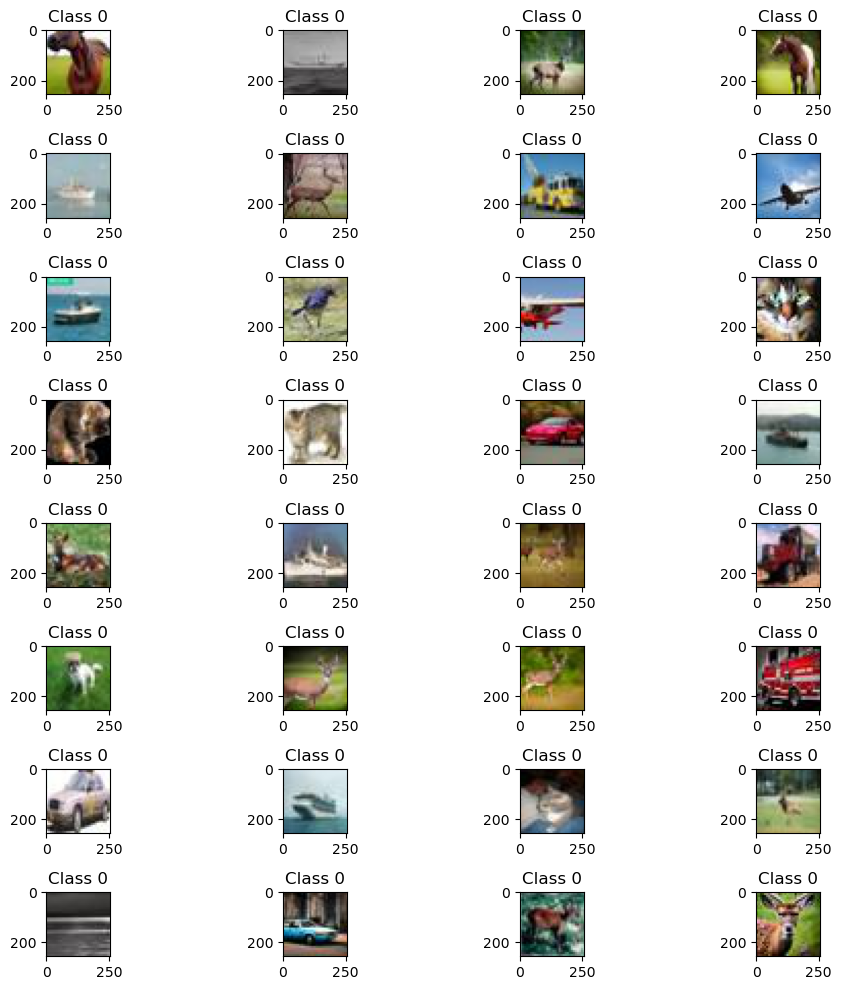

In [41]:
plt.figure(figsize=(10, 10)) # This adjusts the overall size of the image to appear

grid_rows = 8 # Specify how many rows and columns we want; Must specify according to batch size
grid_cols = 4

for i in range(grid_rows * grid_cols):
    
    # 1. Specify position
    # Creates a subplot within a larger grid layout, where each cell in the grid can display one image.
    # Form (row, column, position image will be placed in grid; (1 = upper left, 2 = next to it, etc)
    plt.subplot(grid_rows, grid_cols, i + 1) 

    # 2. Show image
    # Images are placed in Numpyarray, access them via slicing
    plt.imshow(image[i])

    # Controls the visibility of the axis lines and labels around each plot. Args are either 'on' or 'off'; default is 'on'
    # plt.axis('off')

    # 3. Show the label of how it was classified (0 or 1)
    plt.title(f'Class {np.argmax(label[i])}')

# Adjusts spacing between subplots to make the layout more compact, organized and reduce overlap
plt.tight_layout() 

plt.show() # Always include to show plot

Now, we are done with preprocessing (we just created an object and used 1 class method) and will build our model

<h2>Typically, we would do this Image preprocessing for our validation set and test set as well.</h2>
<p> Let's do that here: </p>

<h6> Side note: </h6>
<li>Train set = 80% - 70% of data</li>
<li>Validation set = 10% - 15% of data</li>
<li>Test = 10% - 15% percent of data</li>

In [13]:
val_image_data_gen = ImageDataGenerator(rescale=1/255)

validation_set_batch_itertator = val_image_data_gen.flow_from_directory(
directory= '/Users/keirajames/Desktop/archive-2/validation/',
batch_size=32,
class_mode='binary',
shuffle=True
)

Found 9816 images belonging to 2 classes.


In [15]:
test_image_data_gen = ImageDataGenerator(rescale=1/255)

test_set_batch_iterator = test_image_data_gen.flow_from_directory(
directory='/Users/keirajames/Desktop/archive-2/test/',
batch_size=32,
class_mode='binary',
shuffle=True
)

Found 9816 images belonging to 2 classes.


<h1>Building our Neural Network </h1>
<h3> --> Start by importing libraries</h3>

In [16]:
# .models module in Keras provides classes and functions to build and compile deep learning models.
# Sequential model is like a "straightforward stack" of layers, where each layer’s output is passed to the next layer as input.
from tensorflow.keras.models import Sequential 

# .layers module has building blocks to create each part of a neural network.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization 

# Conv2D: finds patterns in images by sliding filters across pixels; filters help identify specific features like edges, colors, shapes
# MaxPooling2D: reduces image size, keeping only important parts; helps the network to focus on main features & makes it faster.
# Flatten: converts 2D data into 1D vector to be fed into fully connected layers.
# Dense: Adds a fully connected layer for learning complex patterns and making predictions.
# Dropout layer: Randomly drops a fraction of neurons during training to reduce overfitting.

<h5> 1. Establish model</h5>

In [17]:
# You can create layers through the Sequential class constructor or use add method
my_model = Sequential()

<h5>2. Add layers </h5>
<p> Layers to add: </p>
<li>Input layer (optional)</li>
<li>Convolutional Layers</li>
<li>Maxpooling Layers</li>
<li>Batch Normalization Layers</li>
<li>Dense Layers</li>
<li>Flatten Layers</li>
<li>Dropout layers</li>

In [18]:
# ************************************** First convulotional layer **************************************************

# First layer needs to have an input or have an Input layer
my_model.add( Conv2D(
    # Number of filters w/ each learning to detect a unique feature
    # Start w/ fewer filters in the beginning and gradually increase them as you go deeper
    # Helps model learn simple features early on & more complex features in deeper layers
    filters=16, 

    # Size of each filter, i.e. the size of the small window that slides 
    # across the input image to detect features.
    # Size (H,W) can be 3,3; 5,5; 7,7
    kernel_size=(3, 3), 

    # Moves filter by 1 pixel each time, covering all parts of the image, capturing more precise detail
    strides=(1,1),

    # Uses ReLU (rectified linear unit) for non-linearity, allowing the model to learn complex features.
    # Helpfulby maintain stronger gradients
    # Helps in understanding nonlinear patterns (curves, textures, shapes, shadows, etc)
    activation='relu',

    # Defines input image dimensions for the first layer only
    input_shape=(256,256,3) 
))

# ************************************** First BatchNormalization layer *************************************************


# As data passes through multiple layers, each layer’s inputs can change, causing something called internal 
# covariate shift (this is  the change in the distribution of each layer's inputs during training). This shift 
# occurs because the parameters of each layer are updated in every training iteration, and it slows down training 
# and makes it harder for the  model to converge. Batch normalization reduces this internal covariate shift by normalizing
# the inputs of each layer, helping the network to learn faster and achieve better accuracy.
my_model.add(BatchNormalization(
    # This defines the axis to normalize across.
    axis=-1,

    # This controls how much of the moving average of mean and variance to use. A higher momentum (like 0.99) means the 
    # model relies more on the running statistics, which is more useful for inference.
    momentum=0.99,

    # This is a small constant added to the variance to prevent division by zero.
    epsilon=0.001,

    # A boolean parameter that determines whether the layer should include the learnable parameter β (shift).
    # Shift helps the model keep track of patterns that aren’t just local to the current batch but 
    # that apply generally across all data. This helps it work better when making predictions, even on new data.
    center=True,

    # A boolean parameter that determines whether the layer should include the learnable parameter γ (scale).
    # Scale lets the model amplify or reduce certain signals instead of assuming every feature needs to be at 
    # exactly the same level. Without it, everything would be flattened too much, limiting how much it can learn.
    scale=True   
))

# ***************************************** First MaxPooling2D layer ********************************************************

# Maxpooling is gonna take the max value after the relu activation and return it back.
my_model.add(MaxPooling2D())


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<h3> Now, how many convolutional and maxpooling you add is optional and dependent on model</h3>
<h4>  Convo layer should have increasing filter sizes (8, 16, 32, 64, 128)</h4>

In [19]:
# Second layers
my_model.add(Conv2D( filters=32, kernel_size=(3, 3), activation='relu')) # change filter to 64
my_model.add(BatchNormalization())
my_model.add(MaxPooling2D()) # default constructor has pool_size=(2, 2)

# Third layers
my_model.add(Conv2D( filters=64, kernel_size=(3, 3), activation='relu')) # change filter to 128
my_model.add(BatchNormalization())
my_model.add(MaxPooling2D())

Things to try:
- Add additional conv layer
- Play with filter amounts
      - Add decreased filter amount in final conv layer
      - Dropout layers

<h4> Now onto the other layers.... </h4>

In [20]:
# ********************************************* Flatten layer ***********************************************************

# Flatten the feature maps into a 1D vector. This layer is often used in image-based models to prepare 
# data for the final layers, which are usually Dense layers that need data in a flat, 1D format to work. 

# After extracting features from the image with layers like Convolutional and Pooling layers, you need to 
# pass those features to a final decision-making layer which expects a single, flat list of numbers. 
# Flatten preps the data for this final part of the network by "flattening" the multi-dimensional data into 1D.
my_model.add(Flatten())


# ********************************************* 1st Dense layer ***********************************************************
# "hidden layer"

my_model.add(Dense(
    # This specifies the number of neurons. Dense(128) creates a layer with 128 neurons. The # of units depends on the 
    # complexity of the data. More neurons can capture more complex patterns.
    units=512, 

    # Defines the activation function applied to each neuron’s output.
    activation='relu'
))

# ********************************************* 1st Dropout layer **************************************************************

# This layer tells model how many neurons to drop when learning. If argument = .5, it tells model to drop 50 % of neurons; 
# makes those neurons work harder to learn instead of relying on others. So of 128 neurons, model will learn w/ only 64
# When you later test or use the model for predictions, dropout stops, and all 128 neurons are active, 
# giving the best results based on what they all learned during training.
my_model.add(Dropout(rate=.09))

# ********************************************* 2nd Dense layer ***********************************************************
# "output layer"

# Output layer (binary classification: fake vs real)
# sigmoid function takes any output and converts into a range btw 0 and 1 (fake or real)
my_model.add(Dense(1, activation='sigmoid'))


In [21]:
# Compile the model
my_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#The Adam optimizer automatically adjusts the learning rate during training, combining the benefits of two optimizers 
#(AdaGrad and RMSProp) to converge quickly. When paired with Batch Normalization, Adam typically performs well because it 
#adapts the learning rate for each parameter, and Batch Normalization keeps activations stable, complementing each other.


<h3> Let's also add Early Stopping</h3>
<p> Early Stopping stops training when the model’s performance reaches a certain level or stops improving. The Early Stopping callback monitors a specific metric (like validation accuracy) during training and stops the training process if that metric stops improving for a specified number of epochs.</p>
<p> You specify: </p>
<li>  monitor: The metric to monitor (e.g., val_accuracy).</li>
<li>  patience: The number of epochs to wait for improvement before stopping training. For example, if you set patience to 5, the training will stop if there’s no improvement for 5 consecutive epochs.</li>
<li>  mode: Specifies whether you're looking for a maximum or minimum (e.g., 'max' for accuracy, 'min' for loss).</li>
<li>  restore_best_weights: If set to True, it will restore the model weights from the epoch with the best monitored metric.</li>

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',   # Monitor validation loss
    patience=3,               # Stop after 3 epochs with no improvement
    mode='min',               # We're looking to stop training when validation loss stops decreasing
    restore_best_weights=True  # Restore the weights from the best epoch
    )

<h3>Finally, fit the model!</h3>

<p> The model.fit method is used to train a model on a dataset; it takes in data (often with labels) and adjusts the model's parameters to learn patterns in that data. It then goes through several training cycles (epochs), refining its understanding to make better predictions.<br> This method returns a History object that contains details about the training process for each epoch (Loss values for the training data, metric values (like accuracy) for the training data, validation loss and validation metrics if a validation set was provided).
This information is saved in .history.history' as a dictionary that can be used to visualize or analyze how the model performed during training. </p>

In [ ]:
history = my_model.fit(
    train_image_batch_iterator, 
    epochs=10, 
    validation_data=val_data_it,
    callbacks=[early_stopping]
    ) 

<h3> Plotting and Visualizing Model Performance </h3>

<h5> Importing some libraries! </h5>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import confusion_matrix

<p> We're going to plot 2 graphs: 1 for accuracy and 1 for loss.</p>

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# Setting loc='best' tells Matplotlib to automatically place the legend in the location where it doesn't overlap with any
# data points, aiming for the clearest layout.
plt.legend(loc='best') 
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

<h3> Finally, run our model on the test dataset and get our accuracy score.</h3>

In [ ]:
def load_true_labels(directory):
    true_labels = []
    for filename in os.listdir(directory):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            if 'REAL' in directory:
                true_labels.append('Real')
            elif 'FAKE' in directory:
                true_labels.append('Fake')
    return true_labels



def predict_images_from_directory(directory, model, target_size=(256, 256), threshold=0.5, batch_size=512):
    results = []
    images = []
    
    for filename in os.listdir(directory):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(directory, filename)
            img = load_img(img_path, target_size=target_size)
            img = img_to_array(img)
            img = img / 255.0
            images.append(img)

            # When the batch is full, make predictions
            if len(images) == batch_size:
                predictions = model.predict(np.array(images))
                for prediction in predictions:
                    label = 'Real' if prediction[0] >= threshold else 'Fake'
                    results.append(label)
                images = []  # Reset the batch
    
    # Process any remaining images that didn't fill a complete batch
    if images:
        predictions = model.predict(np.array(images))
        for prediction in predictions:
            label = 'Real' if prediction[0] >= threshold else 'Fake'
            results.append(label)
    
    return results


# Path to your directories
real_directory = '/kaggle/input/testdata/test/REAL/'
fake_directory = '/kaggle/input/testdata/test/FAKE/'

# Load true labels
true_labels_real = load_true_labels(real_directory)
true_labels_fake = load_true_labels(fake_directory)
true_labels = true_labels_real + true_labels_fake # Combine labels lists

# Get predictions from both directories
predictions_real = predict_images_from_directory(real_directory, my_model)
predictions_fake = predict_images_from_directory(fake_directory, my_model)
predictions = predictions_real + predictions_fake # Combine predictions lists

# Generate confusion matrix
cm = confusion_matrix(true_labels, predictions, labels=['Real', 'Fake'])

# Calculate accuracy
correct_predictions = np.sum(np.array(true_labels) == np.array(predictions))
total_predictions = len(predictions)
accuracy = correct_predictions / total_predictions * 100

# Print accuracy
print(f'Accuracy: {accuracy:.2f}%')


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()